# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


Penjelasan: Pada bagian ini, kita mengimpor berbagai library yang diperlukan untuk analisis data, visualisasi, dan pembuatan model machine learning. Library seperti pandas dan numpy digunakan untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta scikit-learn untuk pemodelan dan evaluasi.

# Data Understanding

In [ ]:
# Load dataset
df = pd.read_csv('A:\DBS\mlTerapanAwal\HeartAttack.csv')

# Tampilkan informasi awal tentang dataset
df_info = df.info()
df_head = df.head()

df_info, df_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1319 non-null   int64  
 1   gender         1319 non-null   int64  
 2   impluse        1319 non-null   int64  
 3   pressurehight  1319 non-null   int64  
 4   pressurelow    1319 non-null   int64  
 5   glucose        1319 non-null   float64
 6   kcm            1319 non-null   float64
 7   troponin       1319 non-null   float64
 8   class          1319 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 92.9+ KB


(None,
    age  gender  impluse  pressurehight  pressurelow  glucose    kcm  troponin  \
 0   64       1       66            160           83    160.0   1.80     0.012   
 1   21       1       94             98           46    296.0   6.75     1.060   
 2   55       1       64            160           77    270.0   1.99     0.003   
 3   64       1       70            120           55    270.0  13.87     0.122   
 4   55       1       64            112           65    300.0   1.08     0.003   
 
       class  
 0  negative  
 1  positive  
 2  negative  
 3  positive  
 4  negative  )

Penjelasan: Pada bagian ini, dataset dimuat dari file CSV dan informasi dasar tentang dataset seperti tipe data dan beberapa baris awal ditampilkan untuk memahami struktur dan isi data.

# Data Preparation

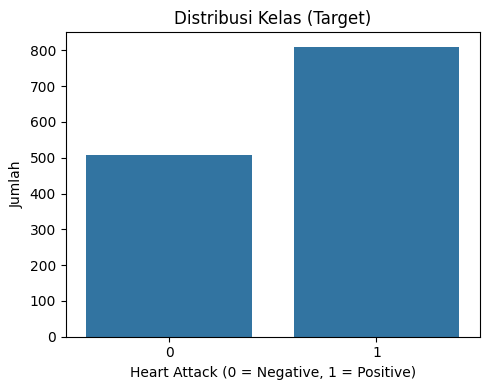

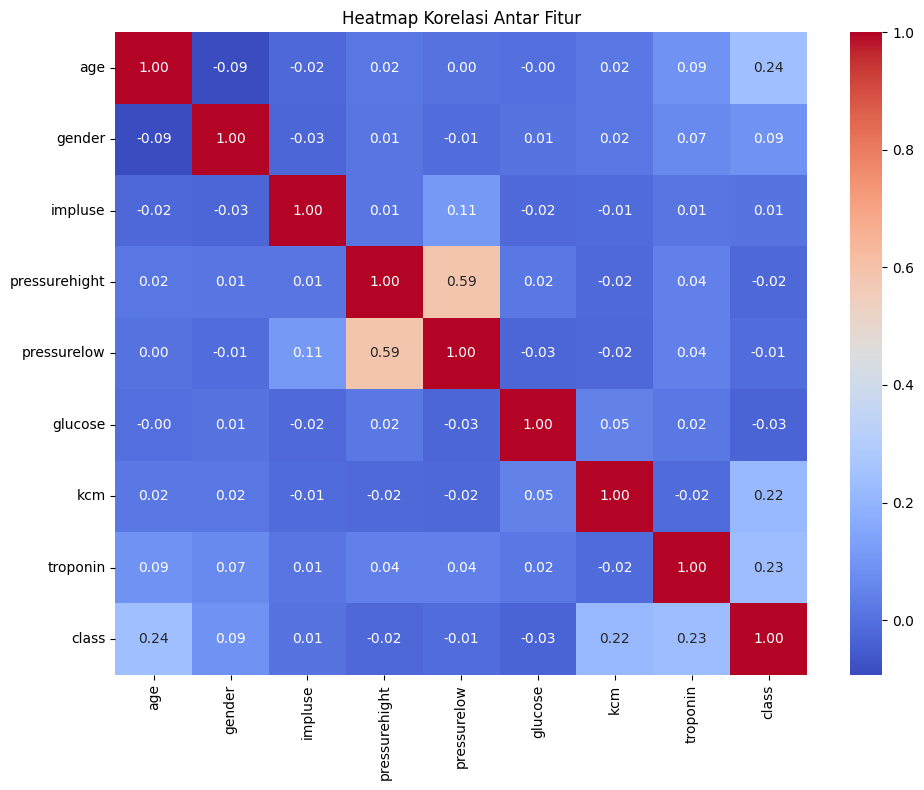

,age,gender,impluse,pressurehight,pressurelow,glucose,kcm,troponin,class
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,56.191812,0.659591,78.336619,127.170584,72.269143,146.634344,15.274306,0.360942,0.614102
std,13.647315,0.474027,51.630270,26.122720,14.033924,74.923045,46.327083,1.154568,0.486991
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.655000,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,169.500000,5.805000,0.085500,1.000000
max,103.000000,1.000000,1111.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [ ]:
# Encode target class
df['class'] = df['class'].map({'negative': 0, 'positive': 1})

# Statistik ringkasan
summary_stats = df.describe()

# Visualisasi distribusi target
plt.figure(figsize=(5, 4))
sns.countplot(x='class', data=df)
plt.title('Distribusi Kelas (Target)')
plt.xlabel('Heart Attack (0 = Negative, 1 = Positive)')
plt.ylabel('Jumlah')
plt.tight_layout()
plt.show()

# Korelasi antar fitur
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Heatmap Korelasi Antar Fitur')
plt.tight_layout()
plt.show()

summary_stats


Penjelasan: Pada bagian ini, kita melakukan encoding pada variabel target agar menjadi numerik, melihat statistik ringkasan data, serta memvisualisasikan distribusi kelas target dan korelasi antar fitur untuk memahami hubungan antar variabel.

# Modeling

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, RocCurveDisplay

# Fitur dan target
X = df.drop('class', axis=1)
y = df['class']

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Penjelasan: Pada bagian ini, kita memisahkan fitur dan target, melakukan normalisasi fitur menggunakan StandardScaler, dan membagi data menjadi data latih dan data uji dengan proporsi 80:20.

In [ ]:
# Model 1: Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]

# Model 2: Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)
lr_probs = lr.predict_proba(X_test)[:, 1]


Penjelasan: Pada bagian ini, kita melatih dua model klasifikasi, yaitu Random Forest dan Logistic Regression, kemudian melakukan prediksi kelas dan probabilitas pada data uji.

# Evaluasi

In [ ]:
# Visualisasi classification report dan confusion matrix
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.tight_layout()
    plt.show()

# Tampilkan classification report sebagai teks
print("Random Forest Classification Report:")
print(classification_report(y_test, rf_preds))

print("Logistic Regression Classification Report:")
print(classification_report(y_test, lr_preds))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       101
           1       0.98      0.99      0.98       163

    accuracy                           0.98       264
   macro avg       0.98      0.98      0.98       264
weighted avg       0.98      0.98      0.98       264

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.69      0.73       101
           1       0.82      0.87      0.84       163

    accuracy                           0.80       264
   macro avg       0.79      0.78      0.78       264
weighted avg       0.80      0.80      0.80       264



Penjelasan: Fungsi untuk memvisualisasikan confusion matrix dibuat, dan classification report dari kedua model ditampilkan untuk mengevaluasi performa model.

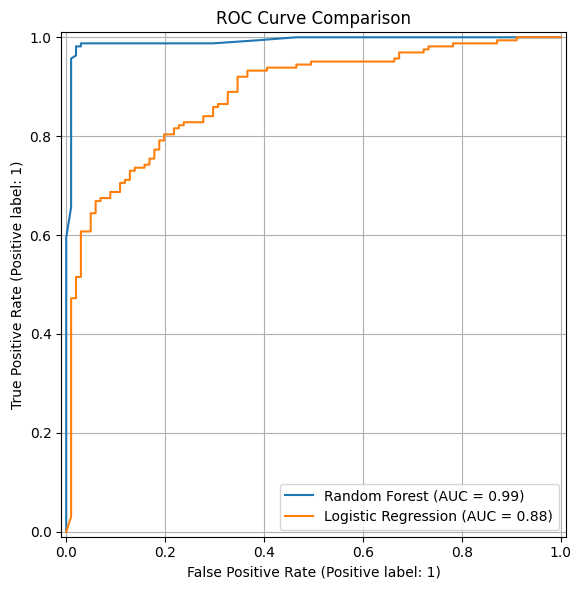

In [ ]:
# Evaluasi
rf_auc = roc_auc_score(y_test, rf_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

# Visualisasi kurva ROC
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(rf, X_test, y_test, name="Random Forest", ax=plt.gca())
RocCurveDisplay.from_estimator(lr, X_test, y_test, name="Logistic Regression", ax=plt.gca())
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.tight_layout()
plt.show()


Penjelasan: Pada bagian ini, dilakukan evaluasi model menggunakan ROC AUC dan visualisasi kurva ROC untuk membandingkan performa kedua model.

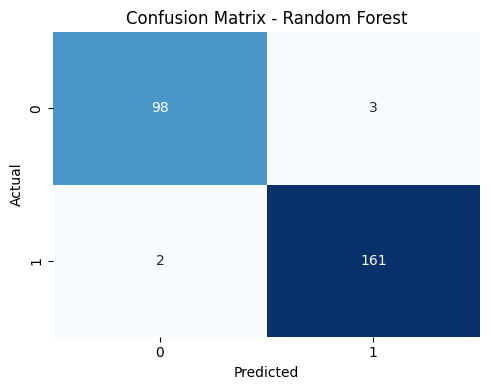

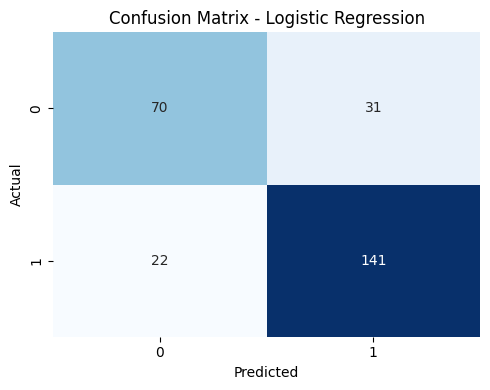

In [ ]:
# Confusion matrices
rf_cm = confusion_matrix(y_test, rf_preds)
lr_cm = confusion_matrix(y_test, lr_preds)

plot_confusion_matrix(rf_cm, "Confusion Matrix - Random Forest")
plot_confusion_matrix(lr_cm, "Confusion Matrix - Logistic Regression")


Penjelasan: Confusion matrix dari kedua model divisualisasikan untuk melihat detail prediksi benar dan salah pada data uji.

C:\Users\arief\AppData\Local\Temp\ipykernel_27432\1049187850.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')


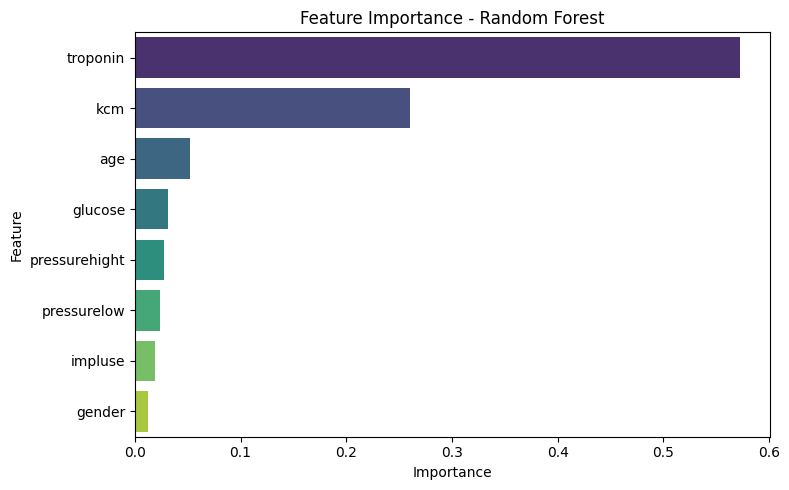

,Feature,Importance
7,troponin,0.572752
6,kcm,0.260462
0,age,0.052370
5,glucose,0.031693
3,pressurehight,0.027971
4,pressurelow,0.023380
2,impluse,0.019374
1,gender,0.011997


In [ ]:
# Ambil feature importance dari model Random Forest
importances = rf.feature_importances_
feature_names = X.columns

# Buat DataFrame dan urutkan
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(8, 5))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

importance_df


Penjelasan: Pada bagian terakhir, kita mengambil dan memvisualisasikan pentingnya fitur dari model Random Forest untuk mengetahui fitur mana yang paling berpengaruh dalam prediksi.